# __*IRIS PREDICTION*__

## __IMPORT LIBRARIES__

In [89]:
import pandas as pd 
import numpy as np
import pandas as pd   
import numpy as np       
import matplotlib.pyplot as plt  
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,balanced_accuracy_score,matthews_corrcoef
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline


from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.multiclass import OneVsRestClassifier

## __EXPLORATORY DATA ANALYSIS__

In [17]:
df = pd.read_csv('train.csv')
df.head()

,id,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,81,5.5,2.4,3.7,1.0,1
1,133,6.3,2.8,5.1,1.5,2
2,137,6.4,3.1,5.5,1.8,2
3,75,6.6,3.0,4.4,1.4,1
4,109,7.2,3.6,6.1,2.5,2


### __SPLIT DATA__

In [69]:
X = df.drop(columns='target')
y = df['target']

num_cols = df.select_dtypes(include=np.number).columns.tolist()

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.1, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

In [42]:
print("Descriptive statistics for numerical features:")
display(df[num_cols].describe())

Descriptive statistics for numerical features:


,id,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000
mean,77.695238,5.842857,3.009524,3.870476,1.239048,1.057143
std,42.081680,0.833304,0.418910,1.721355,0.742720,0.806566
min,0.000000,4.300000,2.000000,1.100000,0.100000,0.000000
25%,44.000000,5.100000,2.800000,1.700000,0.400000,0.000000
50%,81.000000,5.800000,3.000000,4.300000,1.300000,1.000000
75%,113.000000,6.400000,3.300000,5.100000,1.800000,2.000000
max,149.000000,7.700000,4.200000,6.700000,2.500000,2.000000


### __MAIN NUMERIC EXPLORATION__

In [18]:
df.tail()

,id,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
100,71,6.1,2.8,4.0,1.3,1
101,106,4.9,2.5,4.5,1.7,2
102,14,5.8,4.0,1.2,0.2,0
103,92,5.8,2.6,4.0,1.2,1
104,102,7.1,3.0,5.9,2.1,2


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 105 non-null    int64  
 1   sepal length (cm)  105 non-null    float64
 2   sepal width (cm)   105 non-null    float64
 3   petal length (cm)  105 non-null    float64
 4   petal width (cm)   105 non-null    float64
 5   target             105 non-null    int64  
dtypes: float64(4), int64(2)
memory usage: 5.0 KB


In [20]:
df.describe()  

,id,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000
mean,77.695238,5.842857,3.009524,3.870476,1.239048,1.057143
std,42.081680,0.833304,0.418910,1.721355,0.742720,0.806566
min,0.000000,4.300000,2.000000,1.100000,0.100000,0.000000
25%,44.000000,5.100000,2.800000,1.700000,0.400000,0.000000
50%,81.000000,5.800000,3.000000,4.300000,1.300000,1.000000
75%,113.000000,6.400000,3.300000,5.100000,1.800000,2.000000
max,149.000000,7.700000,4.200000,6.700000,2.500000,2.000000


In [21]:
df.columns

Index(['id', 'sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')

In [22]:
df.dtypes 

id                     int64
sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
target                 int64
dtype: object

In [23]:
df.isnull().sum()

id                   0
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

WE CAN NOTICE THAT THERE ARE NO NULLS SO WE ARE SURE THAT WE CAN USE ALL SAMPLES

In [24]:
df.duplicated().sum()

0

### __PAIRPLOT__

/home/lamberto/.local/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/lamberto/.local/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/lamberto/.local/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/lamberto/.local/lib/python3.10/site-package

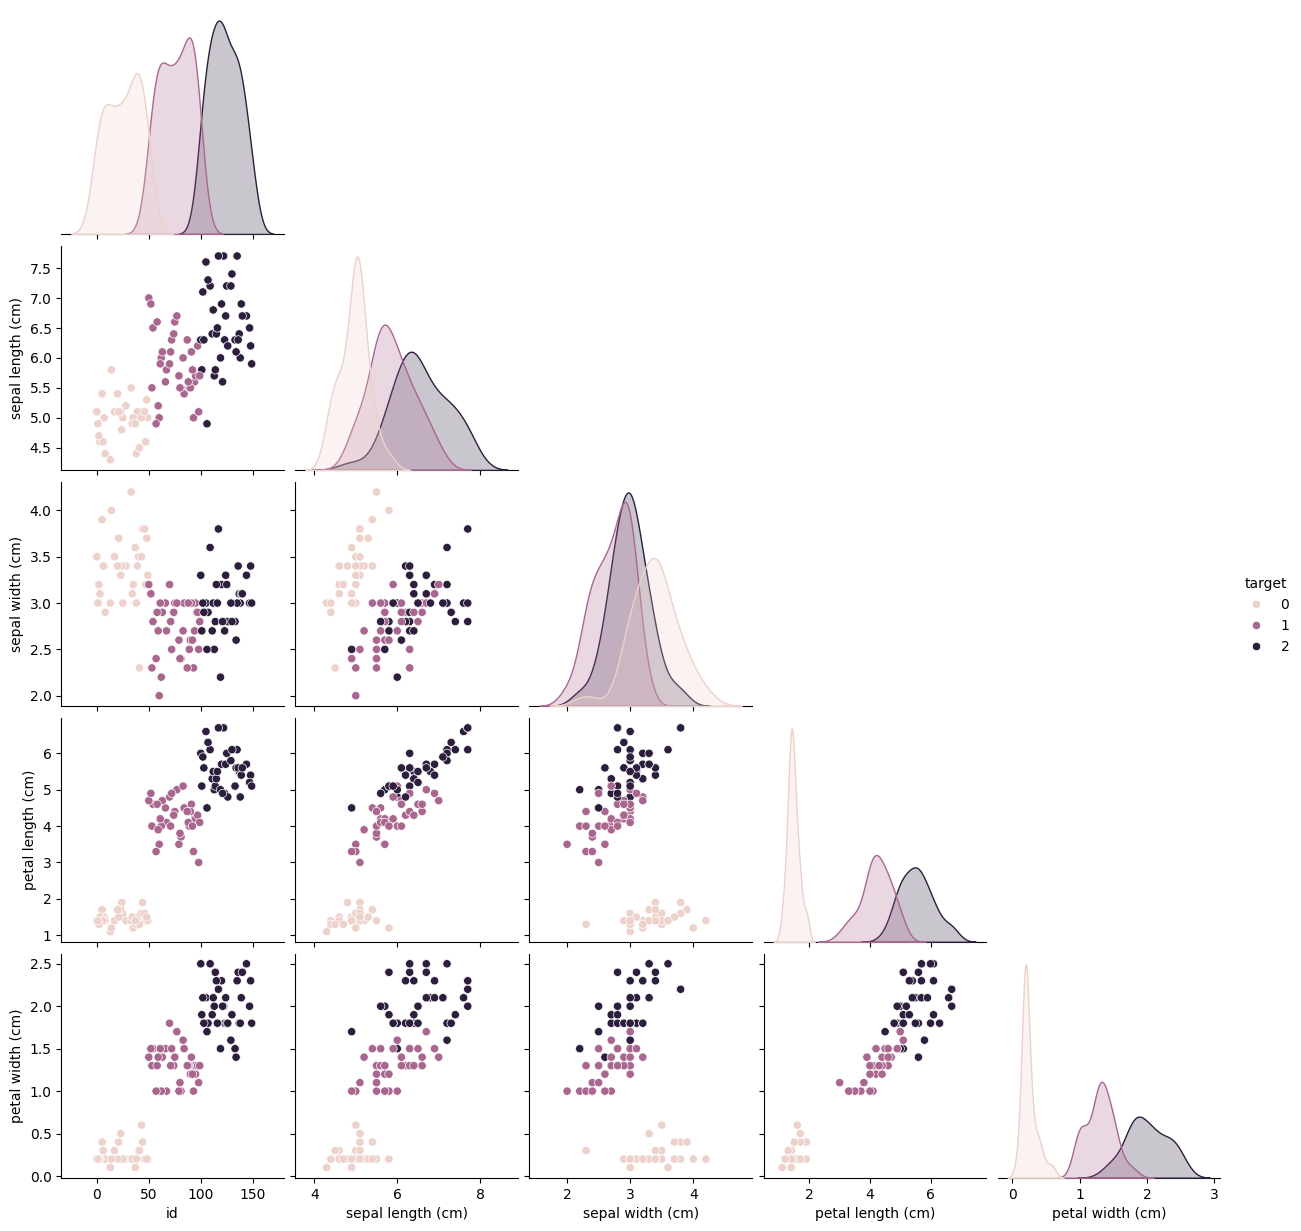

In [26]:
sns.pairplot(df, hue='target', diag_kind='kde', corner=True)
plt.show()

### __COUNTPLOT__

Done to check imbalance

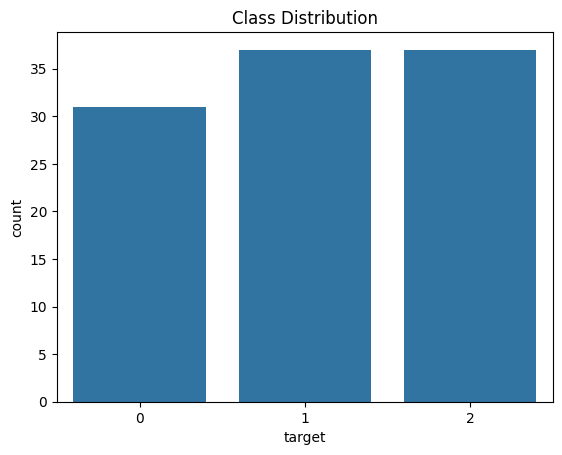

In [27]:
sns.countplot(x='target', data=df)
plt.title('Class Distribution')
plt.show()

There probably is an imbalance on target variable 0

### __BOXPLOT__

/home/lamberto/.local/lib/python3.10/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


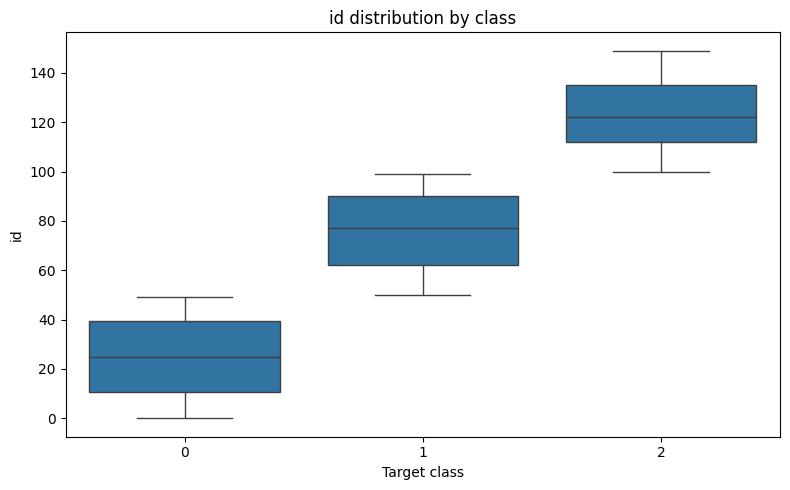

/home/lamberto/.local/lib/python3.10/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


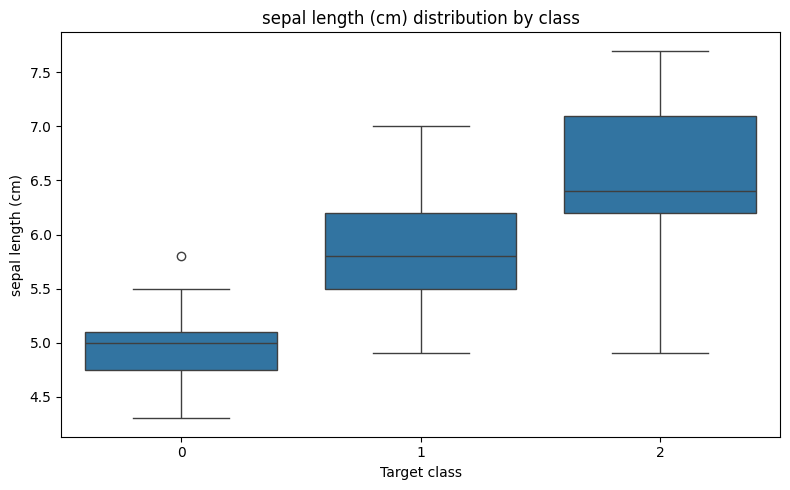

/home/lamberto/.local/lib/python3.10/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


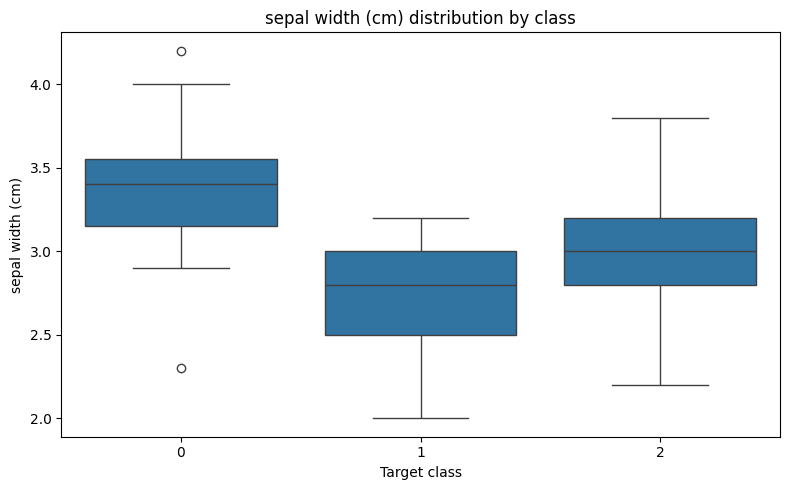

/home/lamberto/.local/lib/python3.10/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


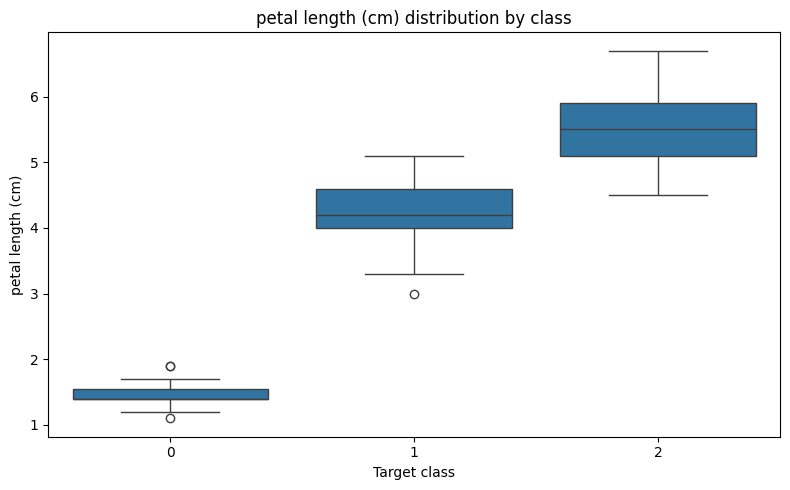

/home/lamberto/.local/lib/python3.10/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


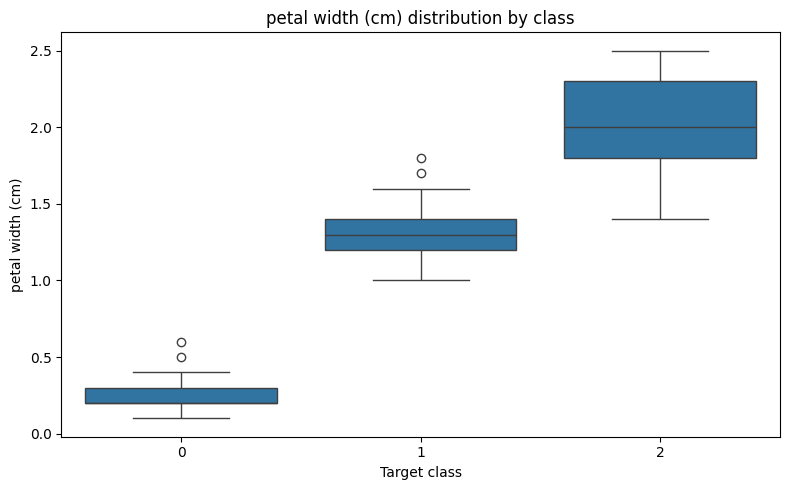

/home/lamberto/.local/lib/python3.10/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


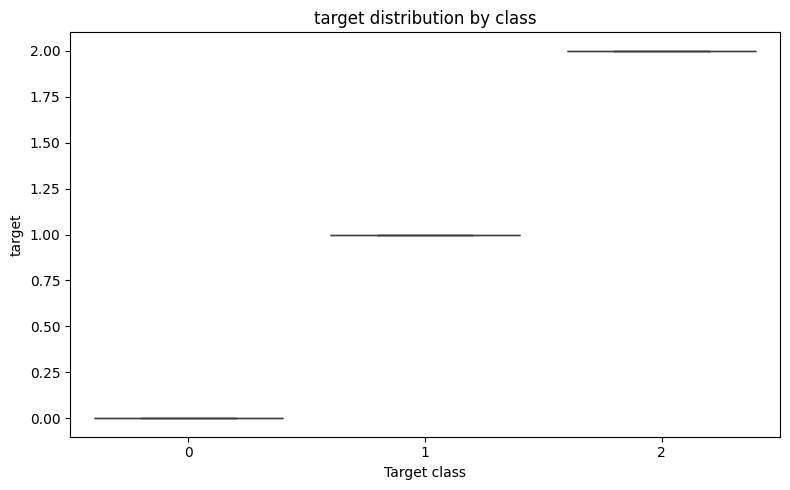

In [44]:
for col in num_cols:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x='target', y=col, data=df)
    plt.title(f'{col} distribution by class')
    plt.xlabel('Target class')
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

### __HEATMAP__

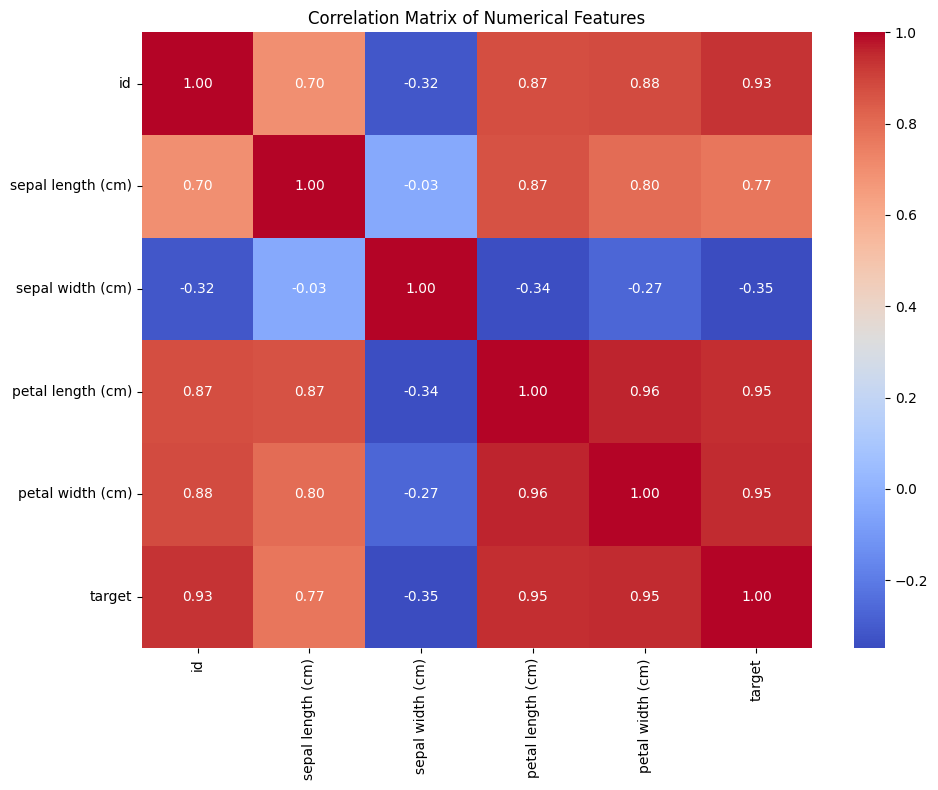

In [ ]:
plt.figure(figsize=(10, 8))
corr = df[num_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show()

## __MODELS__

In [90]:
classifiers = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "Extra Trees": ExtraTreesClassifier(n_estimators=200, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=200, random_state=42),
    "AdaBoost": AdaBoostClassifier(n_estimators=200, random_state=42),
    "Logistic Regression": LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, random_state=42),
    "Ridge Classifier": RidgeClassifier(),
    "LDA": LinearDiscriminantAnalysis(),
    "kNN": KNeighborsClassifier(n_neighbors=5),
    "GaussianNB": GaussianNB(),
    "SVC (OvR)": OneVsRestClassifier(SVC(kernel='rbf', probability=True)),
    "MLP": MLPClassifier(hidden_layer_sizes=(50,50), max_iter=1000, random_state=42)
}

In [91]:
# NOTE: instantiate arrays where to keep the accuracy for better visualization later
results = []
results_5 = []
results_10 = []

# NOTE: Iterate over all the classifiers previously defined (for the moment not fine-tuned)
for name, clf in classifiers.items():
    clf.fit(X_train_scaled, y_train)
    y_pred = clf.predict(X_val_scaled)

    # NOTE: Get the different scores, general one which tends to overfit given the small dataset size and cross validated one more reliable.
    acc = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred, average='macro')
    recall = recall_score(y_val, y_pred, average='macro')
    f1 = f1_score(y_val, y_pred, average='macro')
    balanced_acc = balanced_accuracy_score(y_val, y_pred)
   
    results.append({
            'Classifier': name,
            'Accuracy': acc,
            'Precision': precision,
            'Recall': recall,
            'F1-score': f1,
            'Balanced Accuracy': balanced_acc,
        })
    
   # Cross-validation (use Pipeline for scaling if necessary)
    pipe = Pipeline([('scaler', StandardScaler()), ('clf', clf)])
    scores_5 = cross_val_score(pipe, X, y, cv=5)
    scores_10 = cross_val_score(pipe, X, y, cv=10)
    
    results_5.append((name, np.mean(scores_5)))
    results_10.append((name, np.mean(scores_10)))

    print(f"--- {name} ---")
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision (macro): {precision:.4f}")
    print(f"Recall (macro): {recall:.4f}")
    print(f"F1-score (macro): {f1:.4f}")
    print(f"Balanced Accuracy: {balanced_acc:.4f}")
    print(f"CV 5-fold Accuracy: {np.mean(scores_5):.4f}")
    print(f"CV 10-fold Accuracy: {np.mean(scores_10):.4f}\n")

--- Decision Tree ---
Accuracy: 1.0000
Precision (macro): 1.0000
Recall (macro): 1.0000
F1-score (macro): 1.0000
Balanced Accuracy: 1.0000
CV 5-fold Accuracy: 0.9810
CV 10-fold Accuracy: 0.9900

--- Random Forest ---
Accuracy: 1.0000
Precision (macro): 1.0000
Recall (macro): 1.0000
F1-score (macro): 1.0000
Balanced Accuracy: 1.0000
CV 5-fold Accuracy: 1.0000
CV 10-fold Accuracy: 1.0000

--- Extra Trees ---
Accuracy: 1.0000
Precision (macro): 1.0000
Recall (macro): 1.0000
F1-score (macro): 1.0000
Balanced Accuracy: 1.0000
CV 5-fold Accuracy: 0.9905
CV 10-fold Accuracy: 0.9900

--- Gradient Boosting ---
Accuracy: 1.0000
Precision (macro): 1.0000
Recall (macro): 1.0000
F1-score (macro): 1.0000
Balanced Accuracy: 1.0000
CV 5-fold Accuracy: 0.9905
CV 10-fold Accuracy: 1.0000



/home/lamberto/.local/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/lamberto/.local/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/lamberto/.local/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/lamberto/.local/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warnin

--- AdaBoost ---
Accuracy: 1.0000
Precision (macro): 1.0000
Recall (macro): 1.0000
F1-score (macro): 1.0000
Balanced Accuracy: 1.0000
CV 5-fold Accuracy: 0.9905
CV 10-fold Accuracy: 1.0000

--- Logistic Regression ---
Accuracy: 1.0000
Precision (macro): 1.0000
Recall (macro): 1.0000
F1-score (macro): 1.0000
Balanced Accuracy: 1.0000
CV 5-fold Accuracy: 0.9905
CV 10-fold Accuracy: 0.9900



/home/lamberto/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/lamberto/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/lamberto/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/lamberto/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi

--- Ridge Classifier ---
Accuracy: 0.8182
Precision (macro): 0.8889
Recall (macro): 0.8333
F1-score (macro): 0.8222
Balanced Accuracy: 0.8333
CV 5-fold Accuracy: 0.8571
CV 10-fold Accuracy: 0.8764

--- LDA ---
Accuracy: 1.0000
Precision (macro): 1.0000
Recall (macro): 1.0000
F1-score (macro): 1.0000
Balanced Accuracy: 1.0000
CV 5-fold Accuracy: 1.0000
CV 10-fold Accuracy: 1.0000

--- kNN ---
Accuracy: 1.0000
Precision (macro): 1.0000
Recall (macro): 1.0000
F1-score (macro): 1.0000
Balanced Accuracy: 1.0000
CV 5-fold Accuracy: 0.9905
CV 10-fold Accuracy: 0.9900

--- GaussianNB ---
Accuracy: 1.0000
Precision (macro): 1.0000
Recall (macro): 1.0000
F1-score (macro): 1.0000
Balanced Accuracy: 1.0000
CV 5-fold Accuracy: 0.9905
CV 10-fold Accuracy: 0.9900

--- SVC (OvR) ---
Accuracy: 1.0000
Precision (macro): 1.0000
Recall (macro): 1.0000
F1-score (macro): 1.0000
Balanced Accuracy: 1.0000
CV 5-fold Accuracy: 0.9905
CV 10-fold Accuracy: 1.0000

--- MLP ---
Accuracy: 1.0000
Precision (macro): 1

In [92]:
results_df = pd.DataFrame(results).sort_values(by='Accuracy', ascending=False)
results_df_5 = pd.DataFrame(results_5, columns=['Classifier', 'CV_5_Accuracy']).sort_values(by='CV_5_Accuracy', ascending=False)
results_df_10 = pd.DataFrame(results_10, columns=['Classifier', 'CV_10_Accuracy']).sort_values(by='CV_10_Accuracy', ascending=False)

display(results_df)
display(results_df_5)
display(results_df_10)

,Classifier,Accuracy,Precision,Recall,F1-score,Balanced Accuracy
0,Decision Tree,1.000000,1.000000,1.000000,1.000000,1.000000
1,Random Forest,1.000000,1.000000,1.000000,1.000000,1.000000
2,Extra Trees,1.000000,1.000000,1.000000,1.000000,1.000000
3,Gradient Boosting,1.000000,1.000000,1.000000,1.000000,1.000000
4,AdaBoost,1.000000,1.000000,1.000000,1.000000,1.000000
5,Logistic Regression,1.000000,1.000000,1.000000,1.000000,1.000000
7,LDA,1.000000,1.000000,1.000000,1.000000,1.000000
8,kNN,1.000000,1.000000,1.000000,1.000000,1.000000
9,GaussianNB,1.000000,1.000000,1.000000,1.000000,1.000000
10,SVC (OvR),1.000000,1.000000,1.000000,1.000000,1.000000


,Classifier,CV_5_Accuracy
1,Random Forest,1.000000
7,LDA,1.000000
2,Extra Trees,0.990476
3,Gradient Boosting,0.990476
4,AdaBoost,0.990476
5,Logistic Regression,0.990476
8,kNN,0.990476
9,GaussianNB,0.990476
10,SVC (OvR),0.990476
0,Decision Tree,0.980952


,Classifier,CV_10_Accuracy
1,Random Forest,1.000000
3,Gradient Boosting,1.000000
4,AdaBoost,1.000000
7,LDA,1.000000
10,SVC (OvR),1.000000
0,Decision Tree,0.990000
2,Extra Trees,0.990000
5,Logistic Regression,0.990000
8,kNN,0.990000
9,GaussianNB,0.990000
